In [18]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, Huber, MeanAbsoluteError

## Data Preperation

In [3]:
df = pd.read_csv("/content/second-hand-car.csv")

In [4]:
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [5]:
print(df.columns)

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')


In [6]:
df.shape

(1000, 12)

In [7]:
sns.pairplot(df[['on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], diag_kind='kde')

Error in callback <function flush_figures at 0x7c7cc14b9510> (for post_execute):


KeyboardInterrupt: ignored

In [8]:
tensor_data = tf.constant(df)
print(tensor_data.shape)

(1000, 12)


In [9]:
print(tensor_data)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float64)


In [10]:
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data[:5])

tf.Tensor(
[[9.820000e+02 5.075580e+05 8.831560e+05 2.000000e+00 1.010690e+05
  1.000000e+00 1.000000e+01 1.300000e+01 1.550000e+02 7.700000e+01
  1.240000e+02 3.413280e+05]
 [6.190000e+02 5.640770e+05 7.674550e+05 6.000000e+00 1.330230e+05
  1.000000e+00 3.000000e+00 8.000000e+00 1.860000e+02 6.000000e+01
  9.900000e+01 1.301125e+05]
 [8.810000e+02 6.507570e+05 7.598670e+05 7.000000e+00 6.995000e+04
  1.000000e+00 7.000000e+00 1.200000e+01 1.700000e+02 1.110000e+02
  1.050000e+02 4.257775e+05]
 [2.610000e+02 6.121010e+05 8.520320e+05 2.000000e+00 1.018650e+05
  5.000000e+00 6.000000e+00 9.000000e+00 1.950000e+02 6.700000e+01
  1.380000e+02 3.302815e+05]
 [8.850000e+02 5.421700e+05 7.689010e+05 2.000000e+00 1.330050e+05
  3.000000e+00 9.000000e+00 1.000000e+01 1.890000e+02 8.300000e+01
  1.000000e+02 1.533815e+05]], shape=(5, 12), dtype=float64)


In [11]:
X = tensor_data[:, 3:-1]
print(X.shape)

(1000, 8)


In [12]:
y = tensor_data[:, -1]
y = tf.expand_dims(y, axis=-1)
print(y.shape)

(1000, 1)


In [13]:
normalizer = Normalization()
normalizer.adapt(X) # adapts the mean and variance
normalizer(X)
print(X[:5, :])

tf.Tensor(
[[2.00000e+00 1.01069e+05 1.00000e+00 1.00000e+01 1.30000e+01 1.55000e+02
  7.70000e+01 1.24000e+02]
 [6.00000e+00 1.33023e+05 1.00000e+00 3.00000e+00 8.00000e+00 1.86000e+02
  6.00000e+01 9.90000e+01]
 [7.00000e+00 6.99500e+04 1.00000e+00 7.00000e+00 1.20000e+01 1.70000e+02
  1.11000e+02 1.05000e+02]
 [2.00000e+00 1.01865e+05 5.00000e+00 6.00000e+00 9.00000e+00 1.95000e+02
  6.70000e+01 1.38000e+02]
 [2.00000e+00 1.33005e+05 3.00000e+00 9.00000e+00 1.00000e+01 1.89000e+02
  8.30000e+01 1.00000e+02]], shape=(5, 8), dtype=float64)


- Sequential API
- Functional API
- Subclass

## Neural Network

In [14]:
model = tf.keras.Sequential([
     InputLayer(input_shape = (8,), batch_size=10),
     normalizer,
     Dense(1),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (10, 8)                   17        
 on)                                                             
                                                                 
 dense (Dense)               (10, 1)                   9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
None


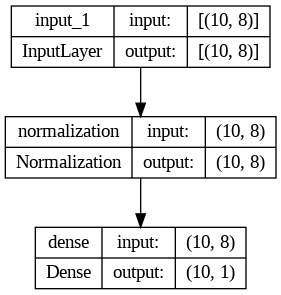

In [15]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

### Alternative Method for constructing Neural Network

In [ ]:
model = tf.keras.Sequential()

model.add(normalizer)
model.add(Dense(1)) # Dense (1) will give one output, Dense (n) will give n outputs
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________
None


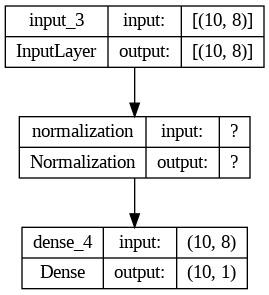

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
model.compile(loss= MeanSquaredError())

## Error Sanctioning